(1025, 2584)
(1025, 2584)


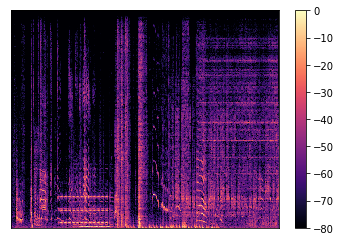

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

out = '/media/amrgaballah/Backup_Plus/DCASE2021_SELD_dataset/foa_dev/dev-train/fold1_room1_mix001.wav'
y, sr = librosa.load(out)
D = librosa.stft(y)  # STFT of y
a = np.abs(D)
print(a.shape)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(S_db.shape)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, scale

from beta_ntf import BetaNTF
from tnmf import SupervisedDL

In [8]:
# S_db
nmf = BetaNTF(data_shape=S_db.shape, n_components=10, n_iter=100, verbose=False, beta=2)
nmf.fit(S_db)
W_uns = nmf.factors_[1]
H_train = nmf.factors_[0]


# nmf = BetaNTF(data_shape=X_test.shape, n_components=10, n_iter=100, verbose=False, beta=2)
# nmf.fixed_factors = [1]
# nmf.factors_[1]  = W_uns
# nmf.fit(X_test)
# H_test = nmf.factors_[0]

Fitting NTF model with 100 iterations....
Done.


In [9]:
print(W_uns.shape)
print(H_train.shape)

(2584, 10)
(1025, 10)


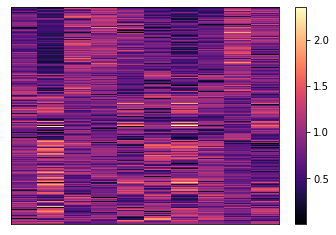

In [10]:
plt.figure()
librosa.display.specshow(W_uns)
plt.colorbar()

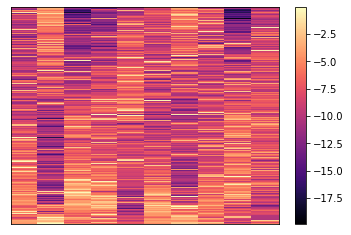

In [11]:
plt.figure()
librosa.display.specshow(H_train)
plt.colorbar()